<a href="https://colab.research.google.com/github/Jake0925/DeepLearning/blob/master/11_1_CNN_padding_maxpool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/hunkim/DeepLearningZeroToAll/blob/master/tf2/tf2-11-1-mnist_cnn.py

https://www.youtube.com/watch?v=E9Xh_fc9KnQ

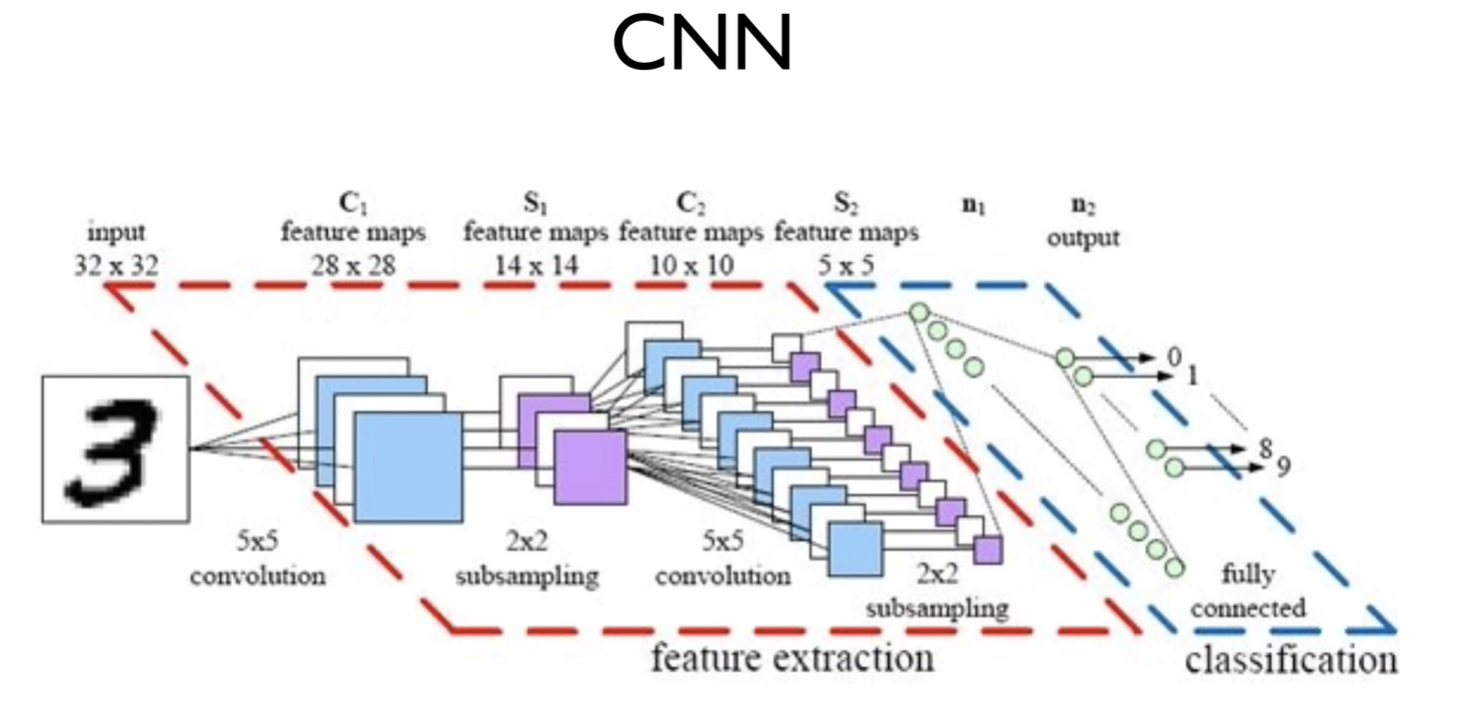

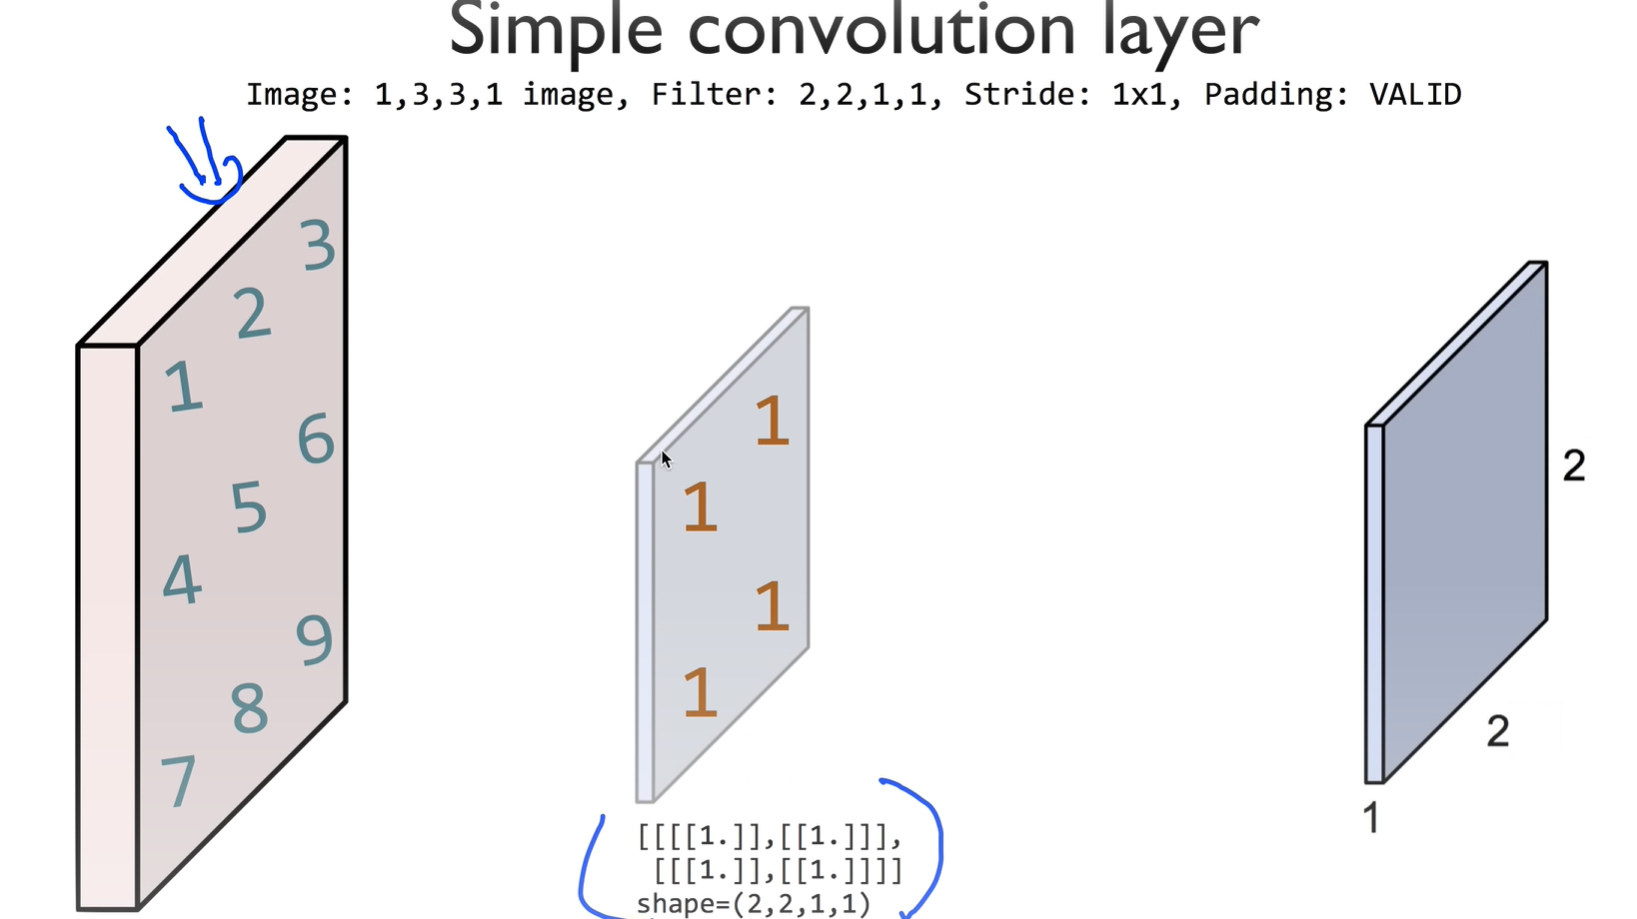

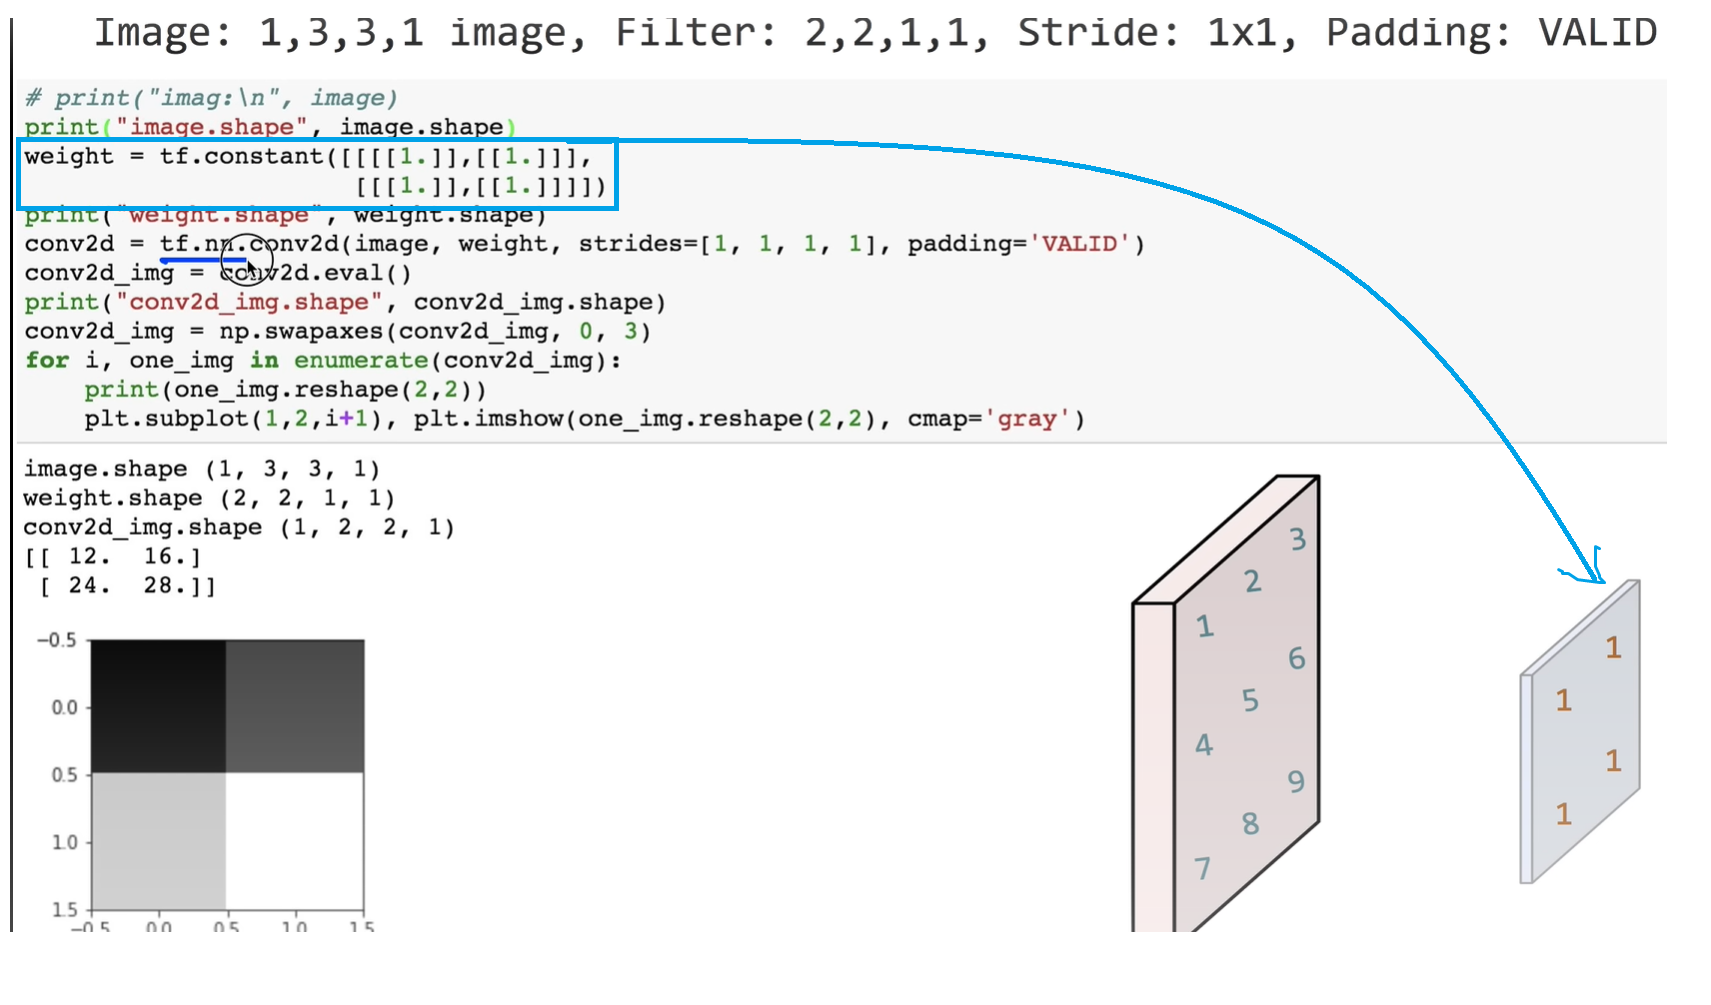

(1, 3, 3, 1)


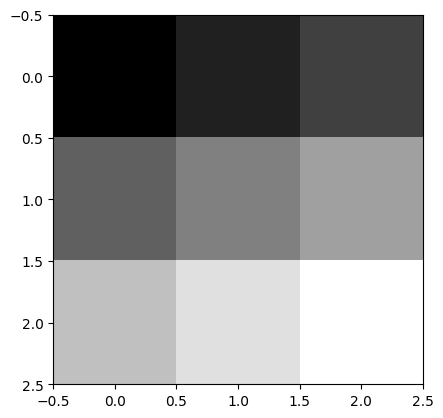

In [5]:
# Lab 11 MNIST and Convolutional Neural Network
import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt

image = np.array([[
                  [[1],[2],[3]],
                  [[4],[5],[6]],
                  [[7],[8],[9]],
                  ]], dtype=np.float32)

print(image.shape) # 몇개의 이미지인가 x W x H x C
plt.imshow(image.reshape(3,3), cmap='gray')

하나의 필터 layer사용

* 필터이미지

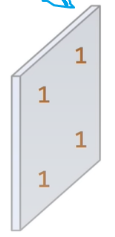

weight shape:  (2, 2, 1, 1)
conv2d_img (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


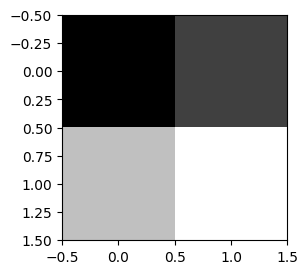

In [11]:

with tf.compat.v1.Session() as sess:

  # 필터
  weight = tf.constant([
                    [[[1.]],[[1.]]],
                    [[[1.]],[[1.]]]
                    ], dtype=tf.float32)
  print("weight shape: ", weight.shape) # 마지막 값 1은 사용할 필터 layer갯수


  # 이미지와 필터 연산
  conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding="VALID")
  conv2d_img = conv2d.eval()


  # 연산결과 표시
  print('conv2d_img', conv2d_img.shape)

  # 입력 x 필터 결과이미지 보기
  for i , one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(2,2),cmap='gray')

3개의필터 layer사용

padding = same

필터 이미지

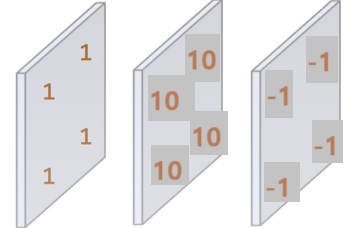

weight shape:  (2, 2, 1, 3)
conv2d_img (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


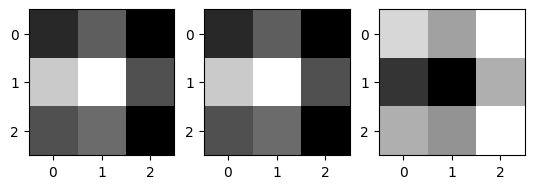

In [10]:
with tf.compat.v1.Session() as sess:

  # 필터
  weight = tf.constant([
                    [[[1., 10., -1.]],[[1., 10., -1.]]],
                    [[[1., 10., -1.]],[[1., 10., -1.]]]
                    ])
  print("weight shape: ", weight.shape) # 마지막 값 3은 사용할 필터 layer갯수


  # 이미지와 필터 연산
  conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding="SAME") # 출력된 이미지의 크기를 입력이미지의 크기와 동일하게 되도록 자동으로 패딩을 크기에 맞게 생성한다
  conv2d_img = conv2d.eval()


  # 입력 x 필터 연산결과값
  print('conv2d_img', conv2d_img.shape)

  conv2d_img = np.swapaxes(conv2d_img, 0, 3)

  # 입력 x 필터 결과이미지 보기
  for i , one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3),cmap='gray')

# Max Pooling

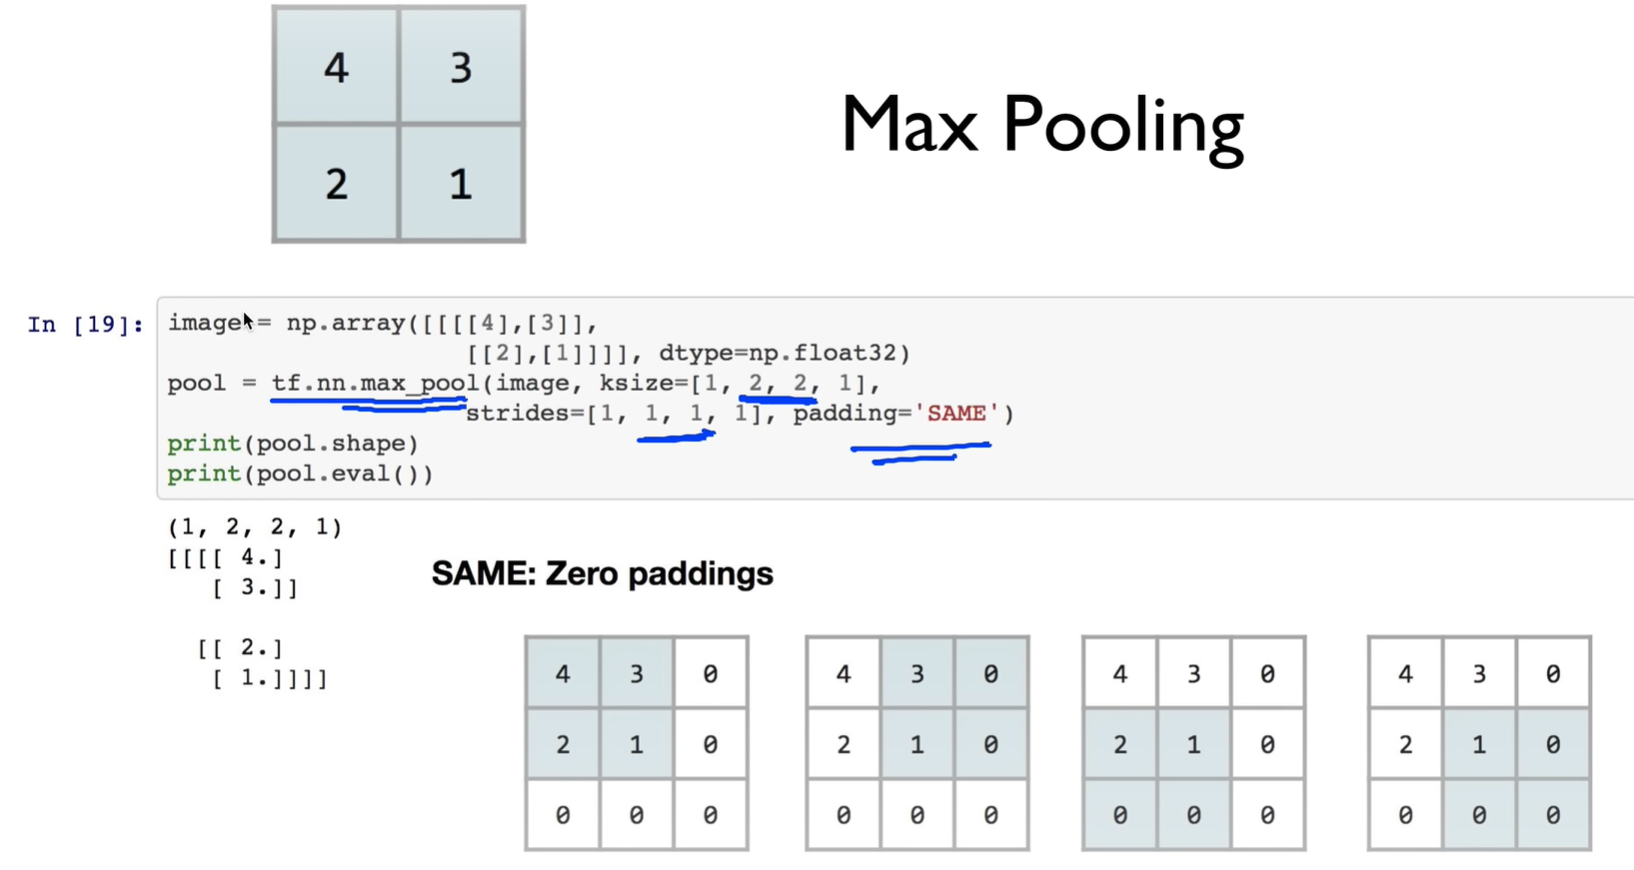

In [13]:
with tf.compat.v1.Session() as sess:
  image2  = np.array([[
                      [[4], [3]],
                      [[2], [1]]
                    ]])

  pool = tf.nn.max_pool(image2, ksize=[1,2,2,1], strides=[1,1,1,1], padding ='SAME') # ksize-pooling의 커널 사이즈


  print(pool.shape)
  print(pool.eval())

(1, 2, 2, 1)
[[[[4]
   [3]]

  [[2]
   [1]]]]
